In [1]:
import json
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from Tests.helper_functions import tokenize
import sys
import os
import torch.nn as nn
import matplotlib.pyplot as plt

sys.path.append('../Python/Tests')

from CNN_small_architecture import CNNSmall

# Setting up the pytorch model

In [2]:
# Setting up the original network
model_original = CNNSmall()
model_original.eval()
# Setting the path to load the model
path = "CNN_small"
load = True
# Loading the model orginal model
if load and os.path.isfile(path):
    model_original.load_state_dict(torch.load(path))

# Testing conv1

Giving conv1 weights from SME to PyTorch model

In [3]:
%cd ../../sme/CNNSmall/Configs
conv1_weights = open('conv1.json')
conv1_weights = json.load(conv1_weights)
model_original.conv1.weight = nn.Parameter(torch.tensor(conv1_weights["weights"]).reshape((3,1,3,3)))
model_original.conv1.bias = nn.Parameter(torch.tensor(conv1_weights["biases"]))

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Configs


Getting the sample used for the SME model

In [4]:
%cd ../Tests/conv1/inputs
sample_0 = open('input1.json')
sample_0 = json.load(sample_0)
sample_0 = torch.tensor(sample_0['buffer']).reshape(1,28,28)

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Tests\conv1\inputs


Getting prediction from PyTorch model

In [5]:
pred_pytorch_conv1 = model_original.conv1(sample_0)

Getting predictions from SME model

In [6]:
%cd ../../../Tests/Network/outputs/test0

sme_conv1 = open('conv1.json')
sme_conv1 = json.load(sme_conv1)

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Tests\Network\outputs\test0


In [7]:
# Restructering for comparison
pred_sme_conv1 = torch.zeros((3,26,26))
j = -1
k = -1

for i in range(len(sme_conv1['Pred'])):
    if (i % 3 == 0):
        k += 1
    if (i % (26 * 3) == 0):
        j += 1
    if (k == 26):
        k = 0
    pred_sme_conv1[i % 3, j , k] = sme_conv1['Pred'][i]

Plotting error

In [8]:
error = torch.abs(pred_sme_conv1 - pred_pytorch_conv1)

In [9]:
error = error.detach()

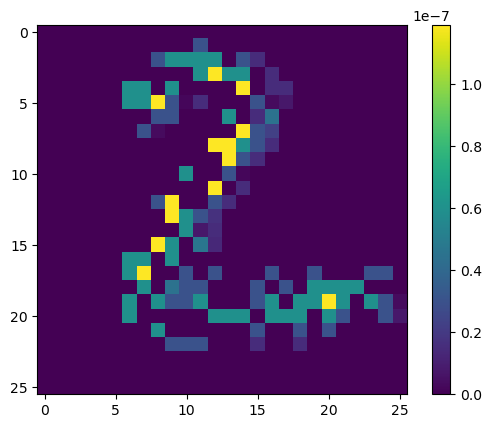

In [10]:
plt.imshow(error[0],vmin = error[0].min(),vmax = error[0].max())
plt.colorbar()

[]

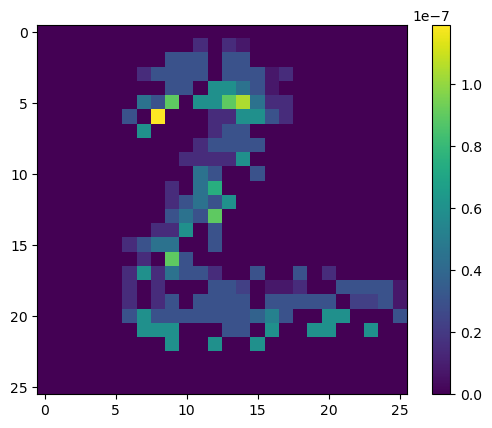

In [11]:
plt.imshow(error[1],vmin = error[1].min(),vmax = error[1].max())
plt.colorbar()
plt.plot()

[]

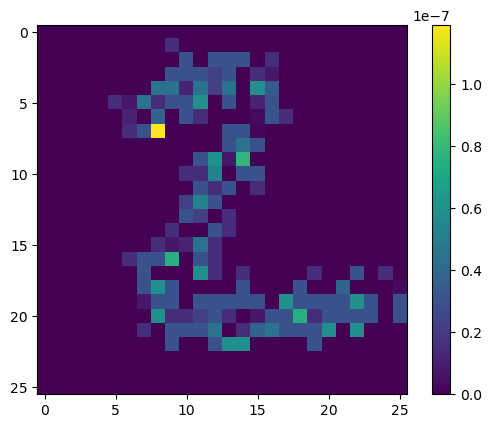

In [12]:
plt.imshow(error[2],vmin = error[2].min(),vmax = error[2].max())
plt.colorbar()
plt.plot()

# Testing batchnorm1

Giving batchNorm1 weights from SME to PyTorch model

In [13]:
%cd ../../../../Configs
batchNorm1_weights = open('batchNorm1.json')
batchNorm1_weights = json.load(batchNorm1_weights)
model_original.batchNorm1.weight = nn.Parameter(torch.tensor(batchNorm1_weights["gammas"]))
model_original.batchNorm1.bias = nn.Parameter(torch.tensor(batchNorm1_weights["betas"]))
model_original.batchNorm1.running_mean = nn.Parameter(torch.tensor(batchNorm1_weights["means"]),requires_grad=False)
model_original.batchNorm1.running_var = nn.Parameter(torch.tensor(batchNorm1_weights["vars"]),requires_grad=False)

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Configs


Getting predictions from PyTorch model

In [14]:
model_original.batchNorm1.training = False

In [15]:
pred_pytorch_batchNorm1 = model_original.batchNorm1(nn.Parameter(pred_sme_conv1.reshape((1,3,26,26)),requires_grad=False))

Getting predictions from SME

In [16]:
%cd ../Tests/Network/outputs/test0

sme_batchNorm1 = open('batchNorm1.json')
sme_batchNorm1 = json.load(sme_batchNorm1)

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Tests\Network\outputs\test0


In [17]:
# Restructering for comparison
pred_sme_batchNorm1 = torch.zeros((3,26,26))
j = -1
k = -1

for i in range(len(sme_batchNorm1['Pred'])):
    if (i % 3 == 0):
        k += 1
    if (i % (26 * 3) == 0):
        j += 1
    if (k == 26):
        k = 0
    pred_sme_batchNorm1[i % 3, j , k] = sme_batchNorm1['Pred'][i]

Plotting the error

In [18]:
error = torch.abs(pred_sme_batchNorm1 - pred_pytorch_batchNorm1)
error = error.detach()
error = error[0]

In [19]:
error.shape

torch.Size([3, 26, 26])

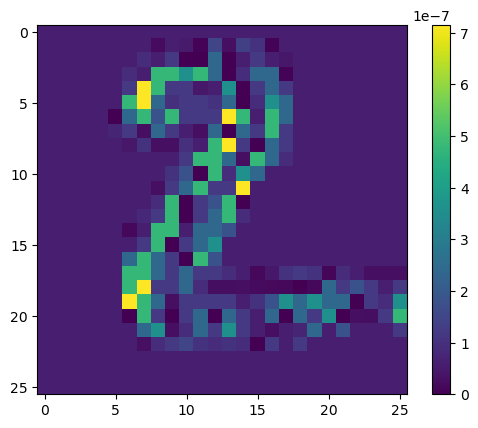

In [20]:
plt.imshow(error[0],vmin = error[0].min(),vmax = error[0].max())
plt.colorbar()

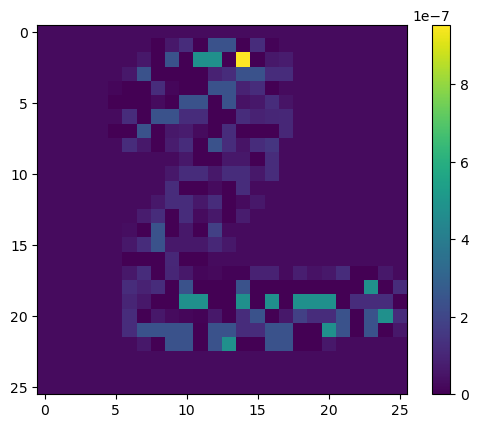

In [21]:
plt.imshow(error[1],vmin = error[1].min(),vmax = error[1].max())
plt.colorbar()

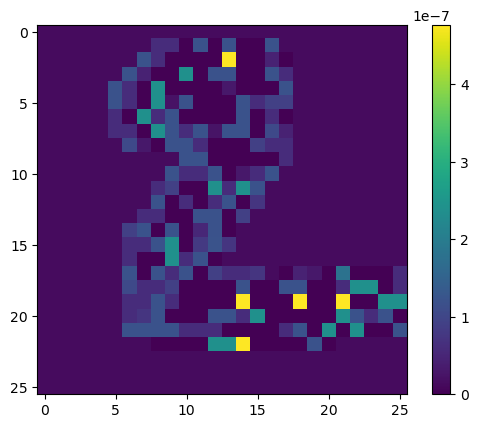

In [22]:
plt.imshow(error[2],vmin = error[2].min(),vmax = error[2].max())
plt.colorbar()

# Testing relu1

Getting predictions from PyTorch

In [23]:
pred_pytorch_relu1 = model_original.relu1(nn.Parameter(pred_sme_batchNorm1))

Getting predictions from SME

In [24]:
sme_relu1 = open('relu1.json')
sme_relu1 = json.load(sme_relu1)

In [25]:
# Restructering for comparison
pred_sme_relu1 = torch.zeros((3,26,26))
j = -1
k = -1

for i in range(len(sme_relu1['Pred'])):
    if (i % 3 == 0):
        k += 1
    if (i % (26 * 3) == 0):
        j += 1
    if (k == 26):
        k = 0
    pred_sme_relu1[i % 3, j , k] = sme_relu1['Pred'][i]

Plotting the error

In [26]:
error = torch.abs(pred_sme_relu1 - pred_pytorch_relu1)
error = error.detach()

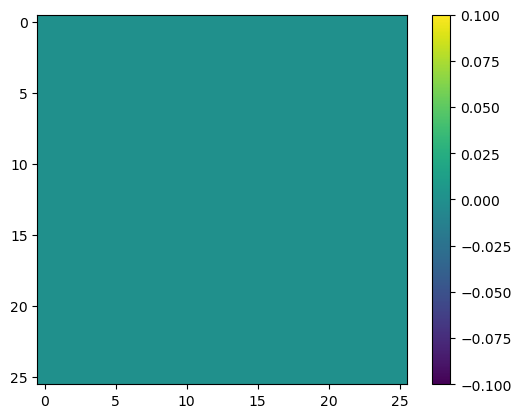

In [27]:
plt.imshow(error[0],vmin = error[0].min(),vmax = error[0].max())
plt.colorbar()

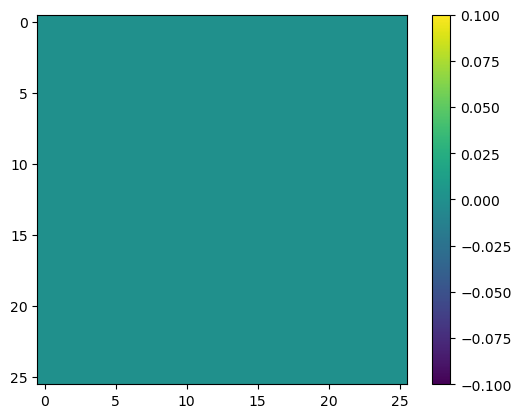

In [28]:
plt.imshow(error[1],vmin = error[1].min(),vmax = error[1].max())
plt.colorbar()

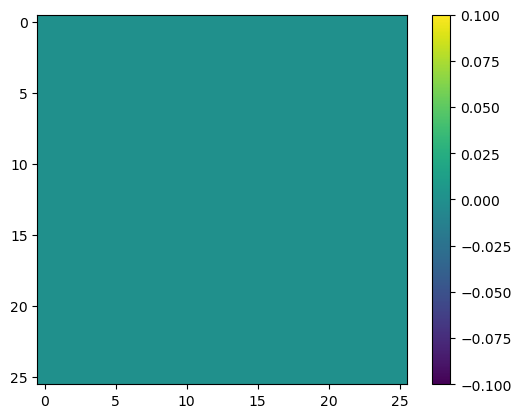

In [29]:
plt.imshow(error[2],vmin = error[2].min(),vmax = error[2].max())
plt.colorbar()

# Testing maxPool1

Getting predictions from PyTorch

In [30]:
pred_pytorch_maxpool1 = model_original.maxPool1(pred_sme_relu1)

In [31]:
pred_pytorch_maxpool1.shape

torch.Size([3, 13, 13])

Getting predictions from SME

In [32]:
sme_maxpool1 = open('maxpool1.json')
sme_maxpool1 = json.load(sme_maxpool1)

In [33]:
# Restructering for comparison
pred_sme_maxpool1 = torch.zeros((3,13,13))
j = -1
k = -1

for i in range(len(sme_maxpool1['Pred'])):
    if (i % 3 == 0):
        k += 1
    if (i % (13 * 3) == 0):
        j += 1
    if (k == 13):
        k = 0
    pred_sme_maxpool1[i % 3, j , k] = sme_maxpool1['Pred'][i]

Plotting the error

In [34]:
error = torch.abs(pred_sme_maxpool1 - pred_pytorch_maxpool1)
error = error.detach()

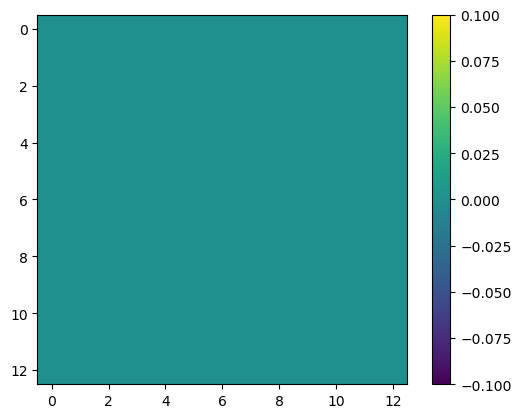

In [35]:
plt.imshow(error[0],vmin = error[0].min(),vmax = error[0].max())
plt.colorbar()

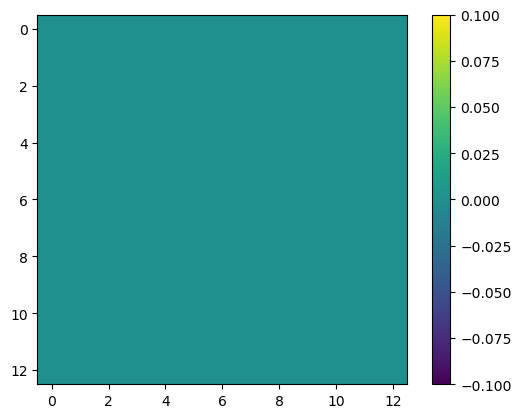

In [36]:
plt.imshow(error[1],vmin = error[1].min(),vmax = error[1].max())
plt.colorbar()

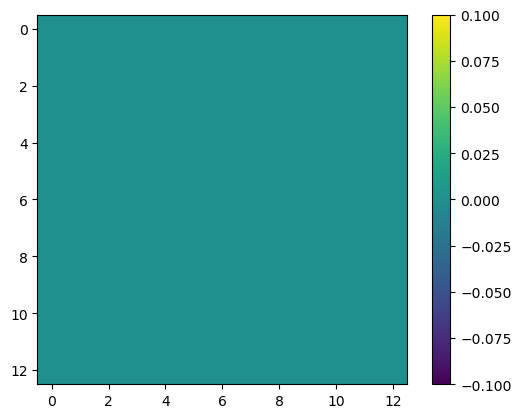

In [37]:
plt.imshow(error[2],vmin = error[2].min(),vmax = error[2].max())
plt.colorbar()

# Testing conv2

In [38]:
%cd ../../../..//Configs
conv2_weights = open('conv2.json')
conv2_weights = json.load(conv2_weights)


c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Configs


In [39]:
torch.tensor(conv1_weights["weights"]).shape

torch.Size([3, 1, 9])

In [40]:
model_original.conv2.weight = nn.Parameter(torch.tensor(conv2_weights["weights"]).reshape(5,3,5,5))
model_original.conv2.bias = nn.Parameter(torch.tensor(conv2_weights["biases"]))

Getting PyTorch model predictions

In [41]:
pred_pytorch_conv2 = model_original.conv2(nn.Parameter(pred_sme_maxpool1))

In [42]:
pred_pytorch_conv2.shape

torch.Size([5, 9, 9])

Getting SME model predictions

In [43]:
%cd ../Tests/Network/outputs/test0

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Tests\Network\outputs\test0


In [44]:
sme_conv2 = open('conv2.json')
sme_conv2 = json.load(sme_conv2)

In [45]:
# Restructering for comparison
pred_sme_conv2 = torch.zeros((5,9,9))
j = -1
k = -1

for i in range(len(sme_conv2['Pred'])):
    if (i % 5 == 0):
        k += 1
    if (i % (9 * 5) == 0):
        j += 1
    if (k == 9):
        k = 0
    pred_sme_conv2[i % 5, j , k] = sme_conv2['Pred'][i]

Plotting the errors

In [46]:
error = torch.abs(pred_sme_conv2 - pred_pytorch_conv2)
error = error.detach()


In [47]:
error.shape

torch.Size([5, 9, 9])

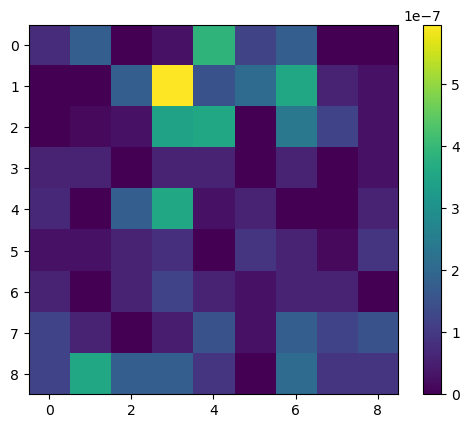

In [48]:
plt.imshow(error[0],vmin = error[0].min(),vmax = error[0].max())
plt.colorbar()

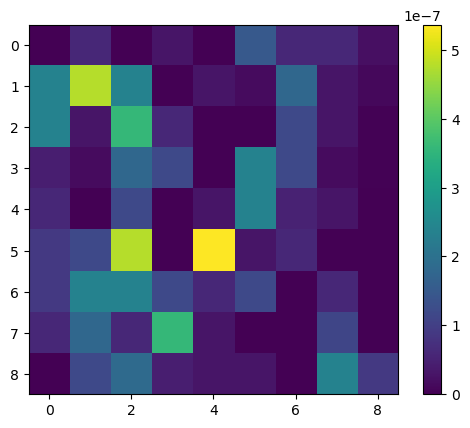

In [49]:
plt.imshow(error[1],vmin = error[1].min(),vmax = error[1].max())
plt.colorbar()

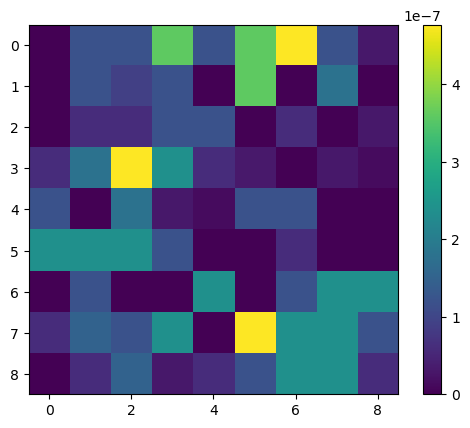

In [50]:
plt.imshow(error[2],vmin = error[2].min(),vmax = error[2].max())
plt.colorbar()

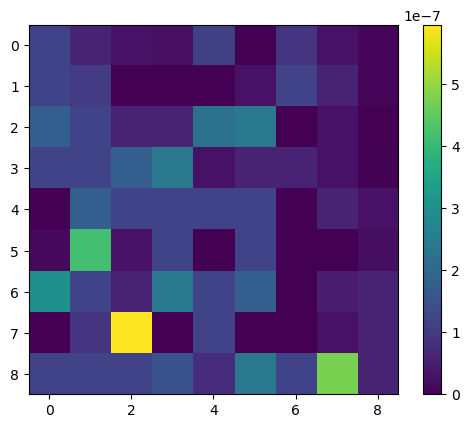

In [51]:
plt.imshow(error[3],vmin = error[3].min(),vmax = error[3].max())
plt.colorbar()

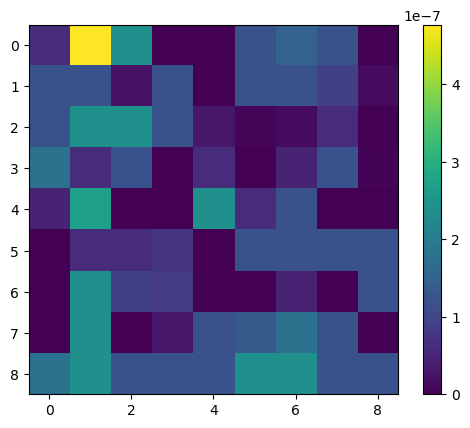

In [52]:
plt.imshow(error[4],vmin = error[4].min(),vmax = error[4].max())
plt.colorbar()

# Testing batchNorm2

In [53]:
%cd ../../../../Configs
batchNorm2_weights = open('batchNorm2.json')
batchNorm2_weights = json.load(batchNorm2_weights)
model_original.batchNorm2.weight = nn.Parameter(torch.tensor(batchNorm2_weights["gammas"]))
model_original.batchNorm2.bias = nn.Parameter(torch.tensor(batchNorm2_weights["betas"]))
model_original.batchNorm2.running_mean = nn.Parameter(torch.tensor(batchNorm2_weights["means"]),requires_grad=False)
model_original.batchNorm2.running_var = nn.Parameter(torch.tensor(batchNorm2_weights["vars"]),requires_grad=False)

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Configs


Getting predictions from PyTorch model

In [54]:
model_original.batchNorm2.training = False

In [55]:
pred_pytorch_batchNorm2 = model_original.batchNorm2(nn.Parameter(pred_sme_conv2.reshape((1,5,9,9)),requires_grad=False))

In [56]:
%cd ../Tests/Network/outputs/test0

sme_batchNorm2 = open('batchNorm2.json')
sme_batchNorm2 = json.load(sme_batchNorm2)

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Tests\Network\outputs\test0


In [57]:
# Restructering for comparison
pred_sme_batchNorm2 = torch.zeros((5,9,9))
j = -1
k = -1

for i in range(len(sme_batchNorm2['Pred'])):
    if (i % 5 == 0):
        k += 1
    if (i % (9 * 5) == 0):
        j += 1
    if (k == 9):
        k = 0
    pred_sme_batchNorm2[i % 5, j , k] = sme_batchNorm2['Pred'][i]

In [58]:
error = torch.abs(pred_sme_batchNorm2 - pred_pytorch_batchNorm2)
error = error.detach()
error = error[0]

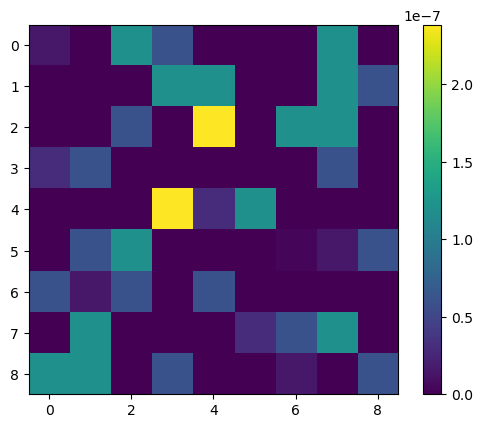

In [59]:
plt.imshow(error[0],vmin = error[0].min(),vmax = error[0].max())
plt.colorbar()

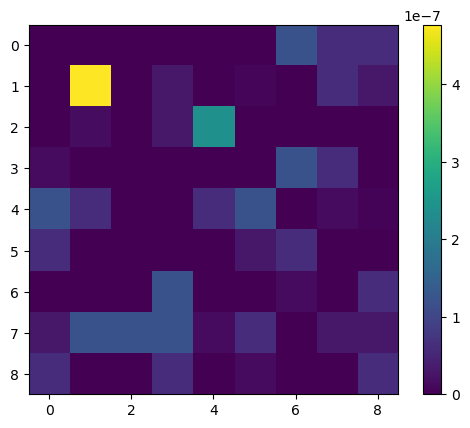

In [60]:
plt.imshow(error[1],vmin = error[1].min(),vmax = error[1].max())
plt.colorbar()

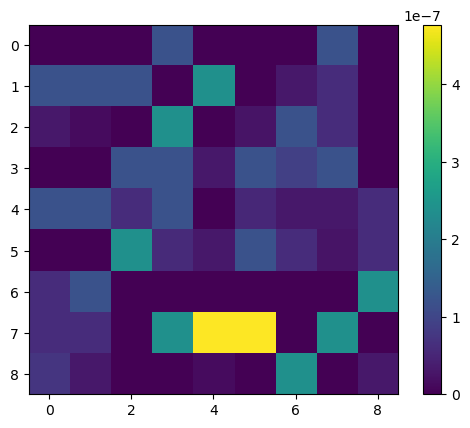

In [61]:
plt.imshow(error[2],vmin = error[2].min(),vmax = error[2].max())
plt.colorbar()

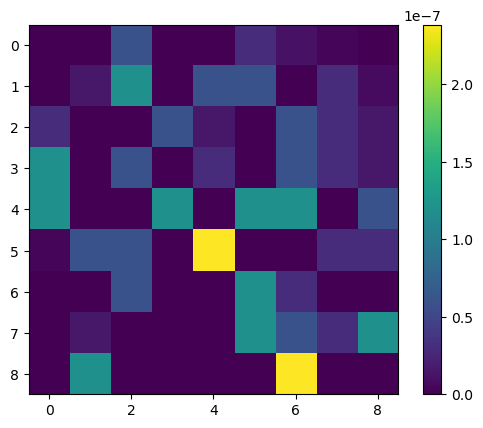

In [62]:
plt.imshow(error[3],vmin = error[3].min(),vmax = error[3].max())
plt.colorbar()

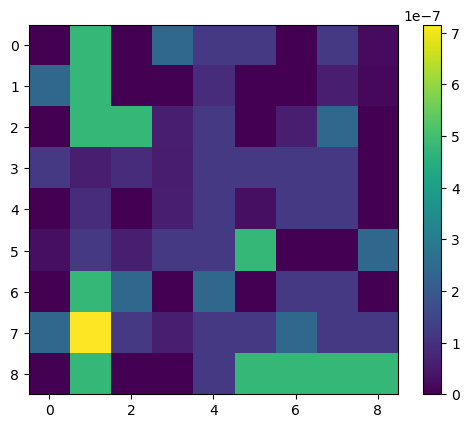

In [63]:
plt.imshow(error[4],vmin = error[4].min(),vmax = error[4].max())
plt.colorbar()

# Testing relu2

Getting predictions from PyTorch

In [64]:
pred_pytorch_relu2 = model_original.relu2(nn.Parameter(pred_sme_batchNorm2))

Getting predictions from SME

In [65]:
sme_relu2 = open('relu2.json')
sme_relu2 = json.load(sme_relu2)

In [66]:
# Restructering for comparison
pred_sme_relu2 = torch.zeros((5,9,9))
j = -1
k = -1

for i in range(len(sme_relu2['Pred'])):
    if (i % 5 == 0):
        k += 1
    if (i % (9 * 5) == 0):
        j += 1
    if (k == 9):
        k = 0
    pred_sme_relu2[i % 5, j , k] = sme_relu2['Pred'][i]

Plotting the error

In [67]:
error = torch.abs(pred_sme_relu2 - pred_pytorch_relu2)
error = error.detach()

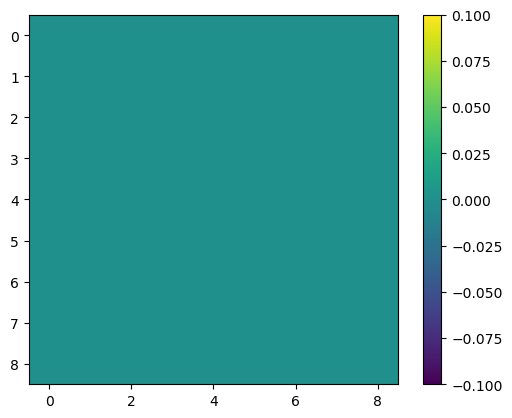

In [68]:
plt.imshow(error[0],vmin = error[0].min(),vmax = error[0].max())
plt.colorbar()

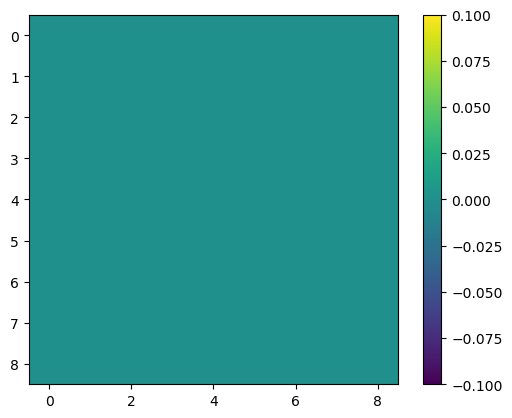

In [69]:
plt.imshow(error[1],vmin = error[1].min(),vmax = error[1].max())
plt.colorbar()

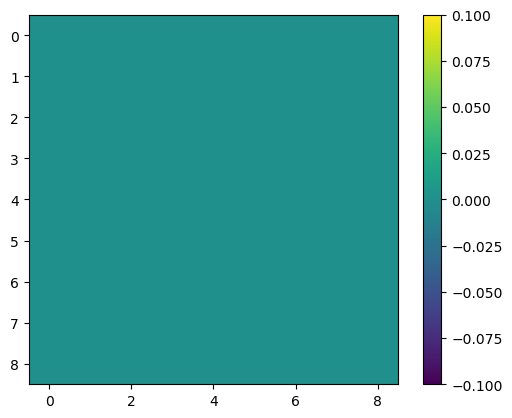

In [70]:
plt.imshow(error[2],vmin = error[2].min(),vmax = error[2].max())
plt.colorbar()

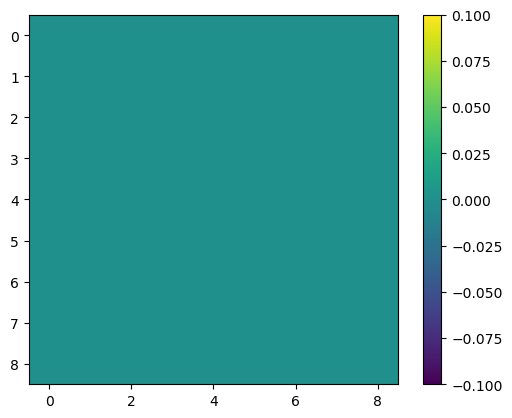

In [71]:
plt.imshow(error[3],vmin = error[3].min(),vmax = error[3].max())
plt.colorbar()

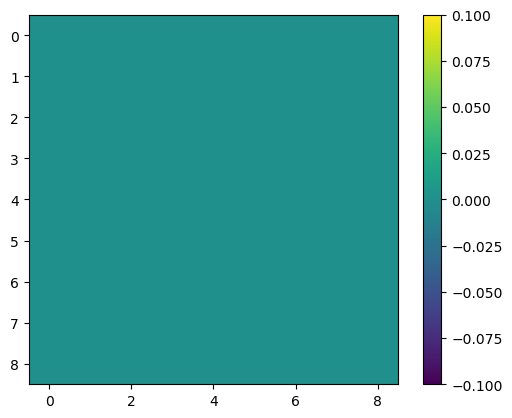

In [72]:
plt.imshow(error[4],vmin = error[4].min(),vmax = error[4].max())
plt.colorbar()

# Testing maxPool2

Getting predictions from PyTorch

In [73]:
pred_pytorch_maxpool2 = model_original.maxPool2(pred_sme_relu2)

In [74]:
pred_pytorch_maxpool2.shape

torch.Size([5, 3, 3])

Getting predictions from SME

In [75]:
sme_maxpool2 = open('maxpool2.json')
sme_maxpool2 = json.load(sme_maxpool2)

In [76]:
# Restructering for comparison
pred_sme_maxpool2 = torch.zeros((5,3,3))
j = -1
k = -1

for i in range(len(sme_maxpool2['Pred'])):
    if (i % 5 == 0):
        k += 1
    if (i % (3 * 5) == 0):
        j += 1
    if (k == 3):
        k = 0
    pred_sme_maxpool2[i % 5, j , k] = sme_maxpool2['Pred'][i]

Plotting the error

In [77]:
error = torch.abs(pred_sme_maxpool2 - pred_pytorch_maxpool2)
error = error.detach()

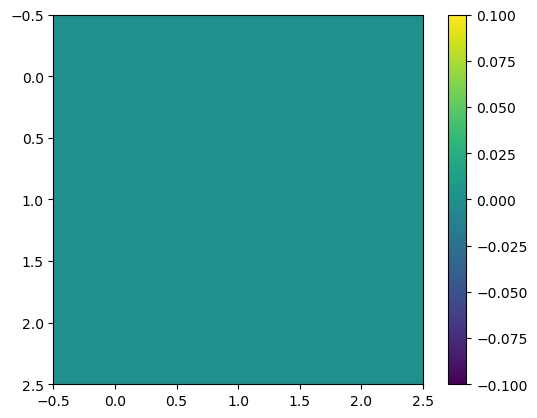

In [78]:
plt.imshow(error[0],vmin = error[0].min(),vmax = error[0].max())
plt.colorbar()

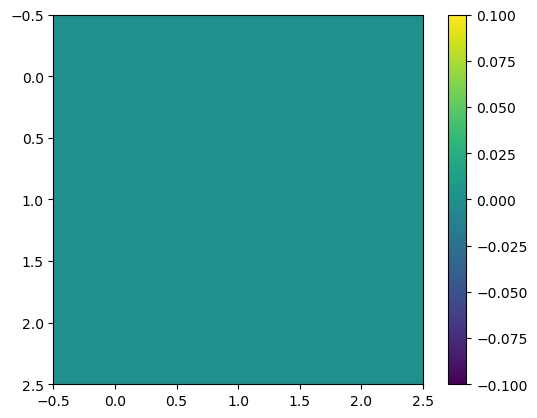

In [79]:
plt.imshow(error[1],vmin = error[1].min(),vmax = error[1].max())
plt.colorbar()

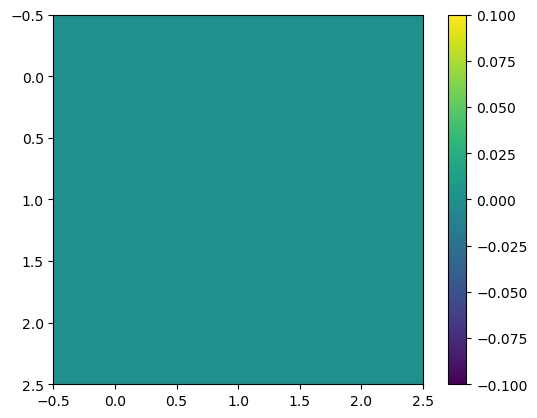

In [80]:
plt.imshow(error[2],vmin = error[2].min(),vmax = error[2].max())
plt.colorbar()

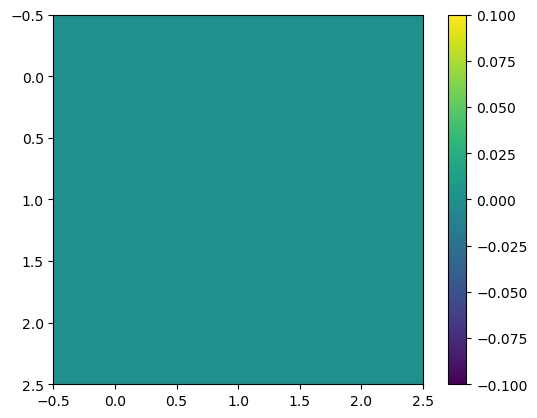

In [81]:
plt.imshow(error[3],vmin = error[3].min(),vmax = error[3].max())
plt.colorbar()

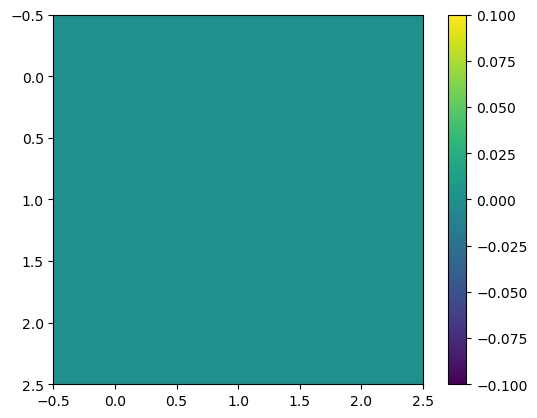

In [82]:
plt.imshow(error[4],vmin = error[4].min(),vmax = error[4].max())
plt.colorbar()

# Testing the linear layer

In [83]:
%cd ../../../../Configs
lin_weights = open('lin.json')
lin_weights = json.load(lin_weights)
model_original.lin.weight = nn.Parameter(torch.tensor(lin_weights["weights"]).reshape((2,45)))
model_original.lin.bias = nn.Parameter(torch.tensor(lin_weights["biases"]))

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Configs


In [85]:
pred_pytorch_lin = model_original.lin(torch.flatten(nn.Parameter(pred_sme_maxpool2)))

In [86]:
pred_pytorch_lin

tensor([-5.2322,  5.5277], grad_fn=<AddBackward0>)

In [88]:
%cd ../Tests/Network/outputs/test0

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Tests\Network\outputs\test0


In [89]:
sme_linear = open('linear.json')
sme_linear = json.load(sme_linear)

In [91]:
pred_sme_linear = torch.tensor(sme_linear["Pred"])

In [113]:
print(pred_sme_linear[0], pred_pytorch_lin[0])
print(pred_sme_linear[1], pred_pytorch_lin[1])

tensor(-5.2322163582) tensor(-5.2322163582, grad_fn=<SelectBackward0>)
tensor(5.5277247429) tensor(5.5277247429, grad_fn=<SelectBackward0>)
